In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Bring in data

In [42]:
ihme_path = 'data/ihme-covid19-04072020/2020_04_05.08.all/Hospitalization_all_locs.csv'
hghi_path = 'data/HGHI_results_040820.csv'
ihme = pd.read_csv(ihme_path)
hghi = pd.read_csv(hghi_path)

# Organize data

In [47]:
# IHME
ihme_mt = ihme[ihme['location_name'] == 'Montana']
ihme_mt.set_index('date', inplace=True)
allbed_cols = ['allbed_lower', 'allbed_mean', 'allbed_upper']
totdea_cols = ['totdea_lower', 'totdea_mean', 'totdea_upper']
deaths_cols = ['deaths_lower', 'deaths_mean', 'deaths_upper']
ICUbed_cols = ['ICUbed_lower', 'ICUbed_mean', 'ICUbed_upper']
ihme_allbed = ihme_mt[allbed_cols]
ihme_totdea = ihme_mt[totdea_cols]
ihme_deaths = ihme_mt[deaths_cols]
ihme_ICUbed = ihme_mt[ICUbed_cols]

#HGHI
hghi_mt = hghi[hghi['State'] == 'MT']
hghi_mt.columns

Index(['State', 'Total Hospital Beds', 'Total ICU Beds',
       'Hospital Bed Occupancy Rate', 'ICU Bed Occupancy Rate',
       'Available Hospital Beds', 'Potentially Available Hospital Beds*',
       'Available ICU Beds', 'Potentially Available ICU Beds*',
       'Adult Population', 'Population 65+', 'Projected Infected Individuals',
       'Proejcted Hospitalized Individuals',
       'Projected Individuals Needing ICU Care',
       'Hospital Beds Needed, Six Months',
       'Percentage of Available Beds Needed, Six Months',
       'Percentage of Potentially Available Beds Needed, Six Months',
       'Percentage of Total Beds Needed, Six Months',
       'Hospital Beds Needed, Twelve Months',
       'Percentage of Available Beds Needed, Twelve Months',
       'Percentage of Potentially Available Beds Needed, Twelve Months',
       'Percentage of Total Beds Needed, Twelve Months',
       'Hospital Beds Needed, Eighteen Months',
       'Percentage of Available Beds Needed, Eighteen Mont

# Calculate stats

In [35]:
# dop = day of peak
ihme_allbed_dop_lower, ihme_allbed_dop_mean, ihme_allbed_dop_upper = ihme_allbed.idxmax()
ihme_deaths_dop_lower, ihme_deaths_dop_mean, ihme_deaths_dop_upper = ihme_deaths.idxmax()
ihme_ICUbed_dop_lower, ihme_ICUbed_dop_mean, ihme_ICUbed_dop_upper = ihme_ICUbed.idxmax()

# max
ihme_allbed_max_lower, ihme_allbed_max_mean, ihme_allbed_max_upper = ihme_allbed.max(axis=0)
ihme_deaths_max_lower, ihme_deaths_max_mean, ihme_deaths_max_upper = ihme_deaths.max(axis=0)
ihme_ICUbed_max_lower, ihme_ICUbed_max_mean, ihme_ICUbed_max_upper = ihme_ICUbed.max(axis=0)





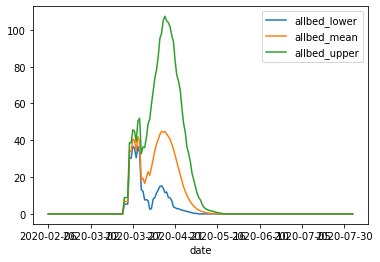

In [43]:
ihme_allbed.plot()

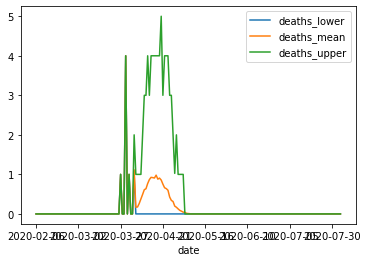

In [44]:
ihme_deaths.plot()

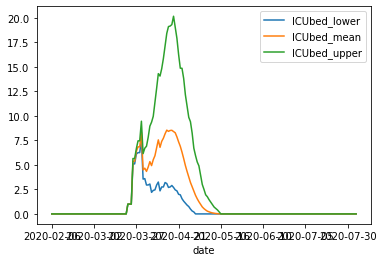

In [45]:
ihme_ICUbed.plot()